In [1]:
# Load python libraries
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Loading data to process

# Path where you store the csv file on your local disk
path_to_data = 'opensponsorship data/task2/'

# Load data as a dataframe using pandas
campaigns_data = pd.read_csv(path_to_data + 'sample_campaigns - data.csv')

users_data = pd.read_csv(path_to_data + 'sample_users - data.csv')

### Check the datatypes of all columns

In [3]:
campaigns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    300 non-null    object
 1   user_id        299 non-null    object
 2   payment        300 non-null    object
 3   updated        300 non-null    object
 4   created        300 non-null    object
 5   isUnpublished  300 non-null    bool  
 6   isDeleted      300 non-null    bool  
 7   isDraft        300 non-null    bool  
 8   isApproved     300 non-null    bool  
 9   isPublic       300 non-null    bool  
 10  published      146 non-null    object
dtypes: bool(5), object(6)
memory usage: 15.7+ KB


In [4]:
print('Unique users - ',len(campaigns_data.user_id.unique()))
print('Unique campaigns - ', len(campaigns_data.campaign_id.unique()))

Unique users -  266
Unique campaigns -  300


In [5]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      836 non-null    object
 1   created      836 non-null    object
 2   planLevel    836 non-null    int64 
 3   lastActive   835 non-null    object
 4   companySize  315 non-null    object
 5   country      725 non-null    object
dtypes: int64(1), object(5)
memory usage: 39.3+ KB


In [6]:
print('Unique users - ',len(users_data.user_id.unique()))

Unique users -  836


### Join campaigns_data and users_data dataframes 

In [7]:
# Left join users_data (right) with campaigns_data (left) on 'user_id' column
merged_df = pd.merge(campaigns_data, users_data, on='user_id', how='left')

merged_df

,campaign_id,user_id,payment,updated,created_x,isUnpublished,isDeleted,isDraft,isApproved,isPublic,published,created_y,planLevel,lastActive,companySize,country
0,61269b87fd44e10d880dd983,61269342b9e1180d61686d9a,"{'cash': {'available': True, 'budget': 5000, '...",2021-08-25 19:38:00,2021-08-25 19:35:35,False,False,True,False,False,NaN,2021-08-25 19:00:19,0.0,2021-08-25 19:38:01,10 - 49 employees,United States
1,60c810edba9bff0d35f14179,60c80e784857720d47bba912,"{'cash': {'available': True, 'budget': 2000, '...",2021-06-15 2:53:04,2021-06-15 2:31:10,False,False,True,False,False,NaN,2021-06-15 2:20:41,0.0,2021-07-12 23:29:44,less than 10 employees,United States
2,5ef62d675ff1190dd60515cb,5ea19a66edfbf30ddb8b55b6,"{'cash': {'available': False, 'budget': ''}, '...",2020-06-26 17:32:49,2020-06-26 17:16:24,False,False,True,False,False,NaN,2020-04-23 13:38:46,0.0,2021-07-31 15:50:11,NaN,United States
3,5fce7222b0ebf60d3cd33336,5ac6677269741c3f0b12f699,"{'cash': {'available': False, 'budget': 2000},...",2020-12-07 18:20:24,2020-12-07 18:19:15,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,613657f332d7960d67273b2e,60897d99fa40140d62906a1c,"{'cash': {'available': True, 'budget': 10000, ...",2021-09-27 15:35:15,2021-09-06 18:03:32,False,False,False,True,True,2021-09-27 15:35:15,2021-04-28 15:22:01,0.0,2021-09-30 17:11:36,less than 10 employees,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,5f5fcb1766fffa728b843b7b,5f5692666881dc0d56f8d904,"{'cash': {'available': True, 'budget': 500}, '...",2020-09-14 19:59:26,2020-09-14 19:57:12,True,False,False,True,False,2020-09-14 19:59:26,2020-09-07 20:04:55,0.0,2021-01-08 16:41:08,10 - 49 employees,United States
296,5cffbac7aa9239460521496d,5ced481646ea1f5c72de4bf6,"{'cash': {'available': True, 'budget': 250}, '...",2019-06-27 15:23:16,2019-06-11 14:29:28,True,False,False,False,False,2019-06-11 21:08:31,2019-05-28 14:39:19,0.0,2019-10-07 16:33:19,NaN,Canada
297,5eed1ecfe741a20dbe336f39,56fb496c7ed840380e1c1a8e,"{'cash': {'available': False, 'budget': 0}, 'p...",2020-06-19 20:23:43,2020-06-19 20:23:43,False,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN
298,613f8b198659dd0d62611c62,594bcc4164f1363a087f4c79,"{'cash': {'available': False, 'budget': ''}, '...",2021-09-13 17:32:09,2021-09-13 17:32:09,True,False,False,True,True,2021-10-01 17:56:04,NaN,NaN,NaN,NaN,NaN


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   campaign_id    300 non-null    object 
 1   user_id        299 non-null    object 
 2   payment        300 non-null    object 
 3   updated        300 non-null    object 
 4   created_x      300 non-null    object 
 5   isUnpublished  300 non-null    bool   
 6   isDeleted      300 non-null    bool   
 7   isDraft        300 non-null    bool   
 8   isApproved     300 non-null    bool   
 9   isPublic       300 non-null    bool   
 10  published      146 non-null    object 
 11  created_y      256 non-null    object 
 12  planLevel      256 non-null    float64
 13  lastActive     256 non-null    object 
 14  companySize    82 non-null     object 
 15  country        236 non-null    object 
dtypes: bool(5), float64(1), object(10)
memory usage: 29.6+ KB


### Change name of the columns `created_x` and `created_y` as `campaign_created` and `brand_created` respectively

### Change date columns such as  `campaign_created`, `brand_created`, `updated`, `published`, `lastActive` from object to datetime datatype

In [11]:
# Change column names
merged_df.rename(columns={'created_x': 'campaign_created', 'created_y': 'brand_created'}, inplace=True)
merged_df.info() # Check column names

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   campaign_id       300 non-null    object 
 1   user_id           299 non-null    object 
 2   payment           300 non-null    object 
 3   updated           300 non-null    object 
 4   campaign_created  300 non-null    object 
 5   isUnpublished     300 non-null    bool   
 6   isDeleted         300 non-null    bool   
 7   isDraft           300 non-null    bool   
 8   isApproved        300 non-null    bool   
 9   isPublic          300 non-null    bool   
 10  published         146 non-null    object 
 11  brand_created     256 non-null    object 
 12  planLevel         256 non-null    float64
 13  lastActive        256 non-null    object 
 14  companySize       82 non-null     object 
 15  country           236 non-null    object 
dtypes: bool(5), float64(1), object(10)
memory us

In [12]:
# Change column datatypes

# List of columns to convert to datetime
columns_to_convert = ['campaign_created', 'brand_created', 'updated', 'published', 'lastActive']

# Convert the columns to datetime data type
merged_df[columns_to_convert] = merged_df[columns_to_convert].apply(pd.to_datetime, errors='coerce')

merged_df.info() # Check data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   campaign_id       300 non-null    object        
 1   user_id           299 non-null    object        
 2   payment           300 non-null    object        
 3   updated           300 non-null    datetime64[ns]
 4   campaign_created  300 non-null    datetime64[ns]
 5   isUnpublished     300 non-null    bool          
 6   isDeleted         300 non-null    bool          
 7   isDraft           300 non-null    bool          
 8   isApproved        300 non-null    bool          
 9   isPublic          300 non-null    bool          
 10  published         146 non-null    datetime64[ns]
 11  brand_created     256 non-null    datetime64[ns]
 12  planLevel         256 non-null    float64       
 13  lastActive        256 non-null    datetime64[ns]
 14  companySize       82 non-n

In [13]:
merged_df.planLevel.value_counts()

0.0    226
3.0     13
9.0     11
1.0      4
2.0      2
Name: planLevel, dtype: int64

# 1. What is the ratio of brands that published campaigns vs. did not publish any campaign within each plan level?

In [14]:
# Group by 'planLevel' and calculate the number of true values ('isUnpublished' = True) and the total number of rows in each group
grouped_df = merged_df.groupby('planLevel')['isUnpublished'].agg(true_count='sum', total_count='size')

# Calculate the number of false values ('isUnpublished' = False) for each group
grouped_df['false_count'] = grouped_df['total_count'] - grouped_df['true_count']

grouped_df # Check the table

,true_count,total_count,false_count
planLevel,,,
0.0,94,226,132
1.0,3,4,1
2.0,0,2,2
3.0,3,13,10
9.0,8,11,3


In [15]:
# Ratio of brands that published campaigns ('isUnpublished' = False) vs 
# did not publish ('isUnpublished' = True) any campaign within each plan level

# to avoid confusion, change column names
grouped_df.rename(columns={'true_count': 'notPublished', 'false_count': 'published'}, inplace=True)
grouped_df['ratio'] = grouped_df['published'] / grouped_df['notPublished']
grouped_df[['ratio']]

,ratio
planLevel,
0.0,1.404255
1.0,0.333333
2.0,inf
3.0,3.333333
9.0,0.375000


# 2. How many brands continued to create campaigns after their first published one?

In [16]:
# Use just the required columns
df = merged_df[['user_id', 'campaign_created', 'isUnpublished']]

In [17]:
# Filter to include only published campaigns
published_campaigns = df[df['isUnpublished'] == False]

# Sort the filtered dataframe by 'user_id' and 'campaign_created' in ascending order
published_campaigns.sort_values(by=['user_id', 'campaign_created'], inplace=True)

# Group by 'user_id' and use transform to get the minimum date for each group
published_campaigns['first_published_date'] = published_campaigns.groupby('user_id')['campaign_created'].transform('min')

# Filter to include only campaigns created after the first published one
continued_campaigns = published_campaigns[published_campaigns['campaign_created'] > published_campaigns['first_published_date']]

# Count the number of brands that continued to create campaigns after their first published one
num_continued_campaigns = continued_campaigns['user_id'].nunique()

print(num_continued_campaigns)

5


/var/folders/yk/4z289d6j397dmyg4t4xs8b1c0000gn/T/ipykernel_5481/2862574684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  published_campaigns.sort_values(by=['user_id', 'campaign_created'], inplace=True)
/var/folders/yk/4z289d6j397dmyg4t4xs8b1c0000gn/T/ipykernel_5481/2862574684.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  published_campaigns['first_published_date'] = published_campaigns.groupby('user_id')['campaign_created'].transform('min')


### Another simple solution

In [18]:
# Filter to include only published campaigns
published_campaigns = df[df['isUnpublished'] == False]

# Get the value_counts() for each user_id i.e., the number of times each user_id appears in the dataframe
user_counts = published_campaigns.user_id.value_counts()

# The number of times a user_id appears in a dataframe is going to be > 1 
# if the brands create campaigns after the first published one

# Add the user_id's with count > 1
(user_counts > 1).sum()

5

## 5 brands that published campaigns after the first one

In [19]:
(user_counts>1)[:5].index

Index(['56fb496c7ed840380e1c1a8e', '5f5692666881dc0d56f8d904',
       '60f73c0d69248c0d60fde6da', '603c9e595557ba0d6a819a8c',
       '5efb7f52dc1fab678e8b8492'],
      dtype='object')

# 3. Which brands have the highest paying campaigns?

In [20]:
# Check the columns to see where to get the information
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   campaign_id       300 non-null    object        
 1   user_id           299 non-null    object        
 2   payment           300 non-null    object        
 3   updated           300 non-null    datetime64[ns]
 4   campaign_created  300 non-null    datetime64[ns]
 5   isUnpublished     300 non-null    bool          
 6   isDeleted         300 non-null    bool          
 7   isDraft           300 non-null    bool          
 8   isApproved        300 non-null    bool          
 9   isPublic          300 non-null    bool          
 10  published         146 non-null    datetime64[ns]
 11  brand_created     256 non-null    datetime64[ns]
 12  planLevel         256 non-null    float64       
 13  lastActive        256 non-null    datetime64[ns]
 14  companySize       82 non-n

### `payment` column has the information about budgets

### NOTE - Assuming from looking at some of the `payment` rows displayed below, `cash_budget`,	`product_budget`, `equity_budget`, `royalty_budget` make up the total budget for campaigning. 

### And, the brand i.e., `user_id` with the highest total budget has the highest paying campaigns

In [21]:
merged_df.payment[0]

"{'cash': {'available': True, 'budget': 5000, 'minBudget': 100}, 'product': {'available': False, 'budget': 100}, 'royalty': {'available': False, 'budget': 10}, 'equity': {'available': False, 'budget': 10}}"

### Creating `cash_available`	`cash_budget`	`product_available`	`product_budget`	`equity_available`	`equity_budget`	`royalty_available`	`royalty_budget` columns to extract their corresponding values.

### `_available` columns to check if the budget is availble and `_budget` columns to calculate the total budget

In [22]:
# Helper function to safely retrieve nested dictionary values
def get_nested_value(d, keys):
    for key in keys:
        if key in d:
            d = d[key]
        else:
            return np.nan
    return d

# Given example list of strings
data = merged_df.payment

# Convert string representation of dictionaries to actual dictionaries
data = [ast.literal_eval(d) for d in data]

# Create a list of dictionaries with both budget and available columns
rows_data = []
for d in data:
    row_data = {
        'cash_available': get_nested_value(d.get('cash', {}), ['available']),
        'cash_budget': get_nested_value(d.get('cash', {}), ['budget']),
        'product_available': get_nested_value(d.get('product', {}), ['available']),
        'product_budget': get_nested_value(d.get('product', {}), ['budget']),
        'equity_available': get_nested_value(d.get('equity', {}), ['available']),
        'equity_budget': get_nested_value(d.get('equity', {}), ['budget']),
        'royalty_available': get_nested_value(d.get('royalty', {}), ['available']),
        'royalty_budget': get_nested_value(d.get('royalty', {}), ['budget'])
    }
    rows_data.append(row_data)

# Create the DataFrame with the desired columns
df_result = pd.DataFrame(rows_data)

# Display the resulting DataFrame
df_result

,cash_available,cash_budget,product_available,product_budget,equity_available,equity_budget,royalty_available,royalty_budget
0,True,5000,False,100,False,10.0,False,10.0
1,True,2000,True,5100,False,0.0,False,0.0
2,False,,False,,True,20.0,False,0.0
3,False,2000,True,100,False,10.0,False,10.0
4,True,10000,True,2500,False,3.0,True,3.0
...,...,...,...,...,...,...,...,...
295,True,500,True,200,False,0.0,False,0.0
296,True,250,True,300,False,0.0,True,15.0
297,False,0,False,0,False,0.0,False,0.0
298,False,,True,100,False,10.0,False,10.0


In [23]:
# Create a dataframe by merging `merged_df` (with campaign and users data) and `df_result` (budget and availability)
budget_data = pd.merge(merged_df, df_result, left_index=True, right_index=True)

In [24]:
budget_data.info() # check all columns and data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   campaign_id        300 non-null    object        
 1   user_id            299 non-null    object        
 2   payment            300 non-null    object        
 3   updated            300 non-null    datetime64[ns]
 4   campaign_created   300 non-null    datetime64[ns]
 5   isUnpublished      300 non-null    bool          
 6   isDeleted          300 non-null    bool          
 7   isDraft            300 non-null    bool          
 8   isApproved         300 non-null    bool          
 9   isPublic           300 non-null    bool          
 10  published          146 non-null    datetime64[ns]
 11  brand_created      256 non-null    datetime64[ns]
 12  planLevel          256 non-null    float64       
 13  lastActive         256 non-null    datetime64[ns]
 14  companySiz

In [25]:
# Convert 'cash_budget' and 'product_budget' to float data type
budget_data['cash_budget'] = pd.to_numeric(budget_data['cash_budget'], errors='coerce').astype(float)
budget_data['product_budget'] = pd.to_numeric(budget_data['product_budget'], errors='coerce').astype(float)

### Check if budget is available by seeing that at least one of the 4 budgets is available

### Calculate the total budget

In [26]:
# Select only the rows / user_id where at least one of the 4 budgets is available
budget_data['budget_available'] = (budget_data.cash_available == True) | (budget_data.product_available == True) |\
            (budget_data.royalty_available == True) | (budget_data.equity_available == True)

In [27]:
# Calculate the total budget
budget_data['total_budget'] = budget_data.cash_budget + budget_data.product_budget + budget_data.royalty_budget +\
budget_data.equity_budget

In [28]:
budget_data.to_csv('2_budget_data')

# 3. RESULT -  Sort the dataframe by descending order of total budget showing top 10 brands (user_id) with the highest paying campaigns 

In [171]:
budget_data.sort_values('total_budget', ascending=False)[['user_id', 'campaign_id', 'total_budget', 'budget_available']][:10]

,user_id,campaign_id,total_budget,budget_available
206,5fac7d3e220e690d333e01ff,5fadff3d414c780d3fe7eef1,600020.0,True
36,5ebf5f5634cd0a0de29d782f,5ebf5ff7f6bc7e0de3140267,110011.1,True
251,60bfaf9d074fb50d59e60187,60bfb8700969130d5ad6c11f,105920.0,True
214,5f25e38d7e8a2b0dfe538335,5fd56919bdf6e10d694df52b,105000.0,True
284,5d8689aa01688c0dc6472965,5d868c3501688c0dc6472a42,104689.5,True
216,5efb7f52dc1fab678e8b8492,6025475a8657070d6871185e,100120.0,True
141,5c77e8ad35d02a64e47973c1,5c780adf35d02a64e47993f3,100120.0,True
228,5eb37800b8d2d80dc7a92c46,5eb3798fb8d2d80dc7a92cd6,100120.0,True
55,60f73c0d69248c0d60fde6da,60f742c61ecc340d615f0f9b,100120.0,True
126,5c573b750da9cb267cbaf91d,5c57b481f70361599fd2e896,100003.1,True


In [172]:
budget_available.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 299
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   campaign_id              293 non-null    object        
 1   user_id                  292 non-null    object        
 2   payment                  293 non-null    object        
 3   updated                  293 non-null    datetime64[ns]
 4   campaign_created         293 non-null    datetime64[ns]
 5   isUnpublished            293 non-null    bool          
 6   isDeleted                293 non-null    bool          
 7   isDraft                  293 non-null    bool          
 8   isApproved               293 non-null    bool          
 9   isPublic                 293 non-null    bool          
 10  published                145 non-null    datetime64[ns]
 11  brand_created            251 non-null    datetime64[ns]
 12  planLevel                251 non-nul

## 2. How many brands continued to create campaigns after their first published one?

## Check to see if that is because of the budget availability

In [173]:
# Create a dictionary to map user_id and the number of campaiagns published
value_map = dict(zip(user_counts.index, user_counts.values))

# Use the map() function to assign values based on the dictionary
budget_available['num_campaigns_published'] = budget_available['user_id'].map(value_map)

# Group by 'user_id' and rank the data based on 'date' to get the campaign number
budget_available['campaign_number'] = budget_available.groupby('user_id')['campaign_created'].\
rank(method='first').astype(int)



/var/folders/yk/4z289d6j397dmyg4t4xs8b1c0000gn/T/ipykernel_15183/271364350.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_available['num_campaigns_published'] = budget_available['user_id'].map(value_map)
/var/folders/yk/4z289d6j397dmyg4t4xs8b1c0000gn/T/ipykernel_15183/271364350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_available['campaign_number'] = budget_available.groupby('user_id')['campaign_created'].\


In [174]:
budget_available[budget_available.user_id.isin((user_counts>1)[:5].index)][['user_id',
                                                                            'campaign_id',
                                                                            'total_budget',
                                                                            'num_campaigns_published',
                                                                            'campaign_created',
                                                                            'campaign_number',
                                                                            'isUnpublished']].\
sort_values(['user_id', 'campaign_created'])

,user_id,campaign_id,total_budget,num_campaigns_published,campaign_created,campaign_number,isUnpublished
293,56fb496c7ed840380e1c1a8e,5cb654efdd439b1c19da7a80,5120.0,8.0,2019-04-16 22:19:27,1,True
29,56fb496c7ed840380e1c1a8e,5dc59875cc47e80dd6a0a0a1,5120.0,8.0,2019-11-08 16:31:50,2,False
292,56fb496c7ed840380e1c1a8e,5ddda3edb255ce0dbed039c7,5120.0,8.0,2019-11-26 22:15:10,3,False
173,56fb496c7ed840380e1c1a8e,5e14bf1bd6a1e00d9c0b9a60,12620.0,8.0,2020-01-07 17:25:47,4,False
44,56fb496c7ed840380e1c1a8e,5e14e77fb8a9d70dc1bca85e,5620.0,8.0,2020-01-07 20:18:08,5,False
95,56fb496c7ed840380e1c1a8e,601451817b99fd0d7a0d3981,5120.0,8.0,2021-01-29 18:18:42,6,False
149,56fb496c7ed840380e1c1a8e,60419a27bb249c0d301abb8d,15120.0,8.0,2021-03-05 02:40:39,7,False
74,56fb496c7ed840380e1c1a8e,6064d3c539d4f30d6705f461,0.0,8.0,2021-03-31 19:55:50,8,False
68,5efb7f52dc1fab678e8b8492,5efb81c927086d11b7953988,230.0,2.0,2020-06-30 18:17:45,1,False
216,5efb7f52dc1fab678e8b8492,6025475a8657070d6871185e,100120.0,2.0,2021-02-11 15:03:55,2,False


## 4. How long does it take for new brands to publish a campaign? 

In [175]:
merged_df.info() # check data types and for useful columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   campaign_id       300 non-null    object        
 1   user_id           299 non-null    object        
 2   payment           300 non-null    object        
 3   updated           300 non-null    datetime64[ns]
 4   campaign_created  300 non-null    datetime64[ns]
 5   isUnpublished     300 non-null    bool          
 6   isDeleted         300 non-null    bool          
 7   isDraft           300 non-null    bool          
 8   isApproved        300 non-null    bool          
 9   isPublic          300 non-null    bool          
 10  published         146 non-null    datetime64[ns]
 11  brand_created     256 non-null    datetime64[ns]
 12  planLevel         256 non-null    float64       
 13  lastActive        256 non-null    datetime64[ns]
 14  companySize       82 non-n

### To calculate that we need to find the difference between the date the brand was created and the date of the first capaign launched by the brand

In [ ]:
# Use just the useful columns
brands_campaigns = merged_df[['campaign_id', 'user_id', 'campaign_created', 'brand_created', 'planLevel']]

# Group by 'user_id' and select the minimum campaign_created date for each brand
min_dates = brands_campaigns.groupby('user_id')['campaign_created'].transform('min')

# Use boolean indexing to filter rows with the minimum dates (first campaign created) for each 'user_id'
result_df = brands_campaigns[brands_campaigns['campaign_created'] == min_dates]

result_df

In [177]:
# Check if the first campaign rows are correctly selected
merged_df[merged_df.user_id == '5cbe020dc4f74a1687607055'] # 19 Feb first campaign

,campaign_id,user_id,payment,updated,campaign_created,isUnpublished,isDeleted,isDraft,isApproved,isPublic,published,brand_created,planLevel,lastActive,companySize,country
192,5e66ddf65927d10da9c83772,5cbe020dc4f74a1687607055,"{'cash': {'available': True, 'budget': 6250}, ...",2020-03-10 21:15:22,2020-03-10 00:23:18,True,False,False,False,False,2020-03-10 21:11:07,2019-04-22 18:03:58,0.0,2021-03-30 17:23:54,NaN,United States
267,5e4d8ca7ee8fc90dd68ce4d3,5cbe020dc4f74a1687607055,"{'cash': {'available': True, 'budget': 1800}, ...",2020-05-14 20:47:14,2020-02-19 19:29:44,True,False,False,False,False,2020-03-16 15:39:42,2019-04-22 18:03:58,0.0,2021-03-30 17:23:54,NaN,United States


In [178]:
# check
result_df[result_df.user_id == '5cbe020dc4f74a1687607055']

,campaign_id,user_id,campaign_created,brand_created,planLevel
267,5e4d8ca7ee8fc90dd68ce4d3,5cbe020dc4f74a1687607055,2020-02-19 19:29:44,2019-04-22 18:03:58,0.0


In [179]:
# To calculate that we need to find the difference between the date the brand was created
# and the date of the first capaign launched by the brand

result_df['date_diff'] = result_df['campaign_created'] - result_df['brand_created']
# (result_df['campaign_created'] - result_df['brand_created']).sort_values()[:238]

result_df.sort_values(by='date_diff')[:238]

/var/folders/yk/4z289d6j397dmyg4t4xs8b1c0000gn/T/ipykernel_15183/2125945130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['date_diff'] = result_df['campaign_created'] - result_df['brand_created']


,campaign_id,user_id,campaign_created,brand_created,planLevel,date_diff
202,5f5bb237f8d8a50d75192289,5f5bb1e4ee03f20dc9bf718a,2020-09-11 17:22:00,2020-09-11 17:20:37,0.0,0 days 00:01:23
250,5e9dbab2c24aa30dd12c9c47,5e9dba58ecb3ba0dd051efb7,2020-04-20 15:07:30,2020-04-20 15:06:01,0.0,0 days 00:01:29
56,5e8de5bc8fc26a0daf6f74a3,5e8de523d4536d0da893017c,2020-04-08 14:54:53,2020-04-08 14:52:19,0.0,0 days 00:02:34
36,5ebf5ff7f6bc7e0de3140267,5ebf5f5634cd0a0de29d782f,2020-05-16 03:37:28,2020-05-16 03:34:47,0.0,0 days 00:02:41
25,5edf0b9a6889d30dbffec949,5edf0aca1e80790df4437081,2020-06-09 04:10:03,2020-06-09 04:06:35,0.0,0 days 00:03:28
...,...,...,...,...,...,...
102,6083359ce172850d68e7570d,5e7e6033f963da0dc636d6f0,2021-04-23 21:01:16,2020-03-27 20:21:08,9.0,392 days 00:40:08
257,5eaf1855dbe0330de1da424f,5ca9641a288a552580879ed5,2020-05-03 19:15:33,2019-04-07 02:44:42,0.0,392 days 16:30:51
163,60cccad3efa4b20d86c31b21,5d4afb92fa5c1f26f9205f9a,2021-06-18 16:33:24,2019-08-07 16:25:54,0.0,681 days 00:07:30
3,5fce7222b0ebf60d3cd33336,5ac6677269741c3f0b12f699,2020-12-07 18:19:15,NaT,NaN,NaT


## Extract the total seconds and convert to hours

In [ ]:
# Extract the total seconds and convert to hours
result_df['date_diff_hrs'] = result_df['date_diff'].dt.total_seconds() / 3600
result_df['date_diff_hrs']

In [ ]:
# Remove nan 
nonan = result_df[~result_df.date_diff_hrs.isna()][['date_diff_hrs', 'planLevel']]
nonan

## Create range of hours to visualize clearly 

In [182]:
# Define the ranges
ranges = [0, 0.5, 2.5, 25, 200, 1000, float('inf')]
labels = ['0 - 30 mins', '30 mins - 2.5 hrs', '2.5 hrs - 25 hrs', '25 hrs - 200 hrs', '200 hrs - 1000 hrs', '>1000 hrs']

# Create the new column with the ranges
nonan = pd.DataFrame(nonan)
nonan['range'] = pd.cut(nonan['date_diff_hrs'], bins=ranges, labels=labels)

# Calculate the number of points within each range
range_counts = nonan['range'].value_counts().reset_index()
range_counts.columns = ['Range', 'Count']

In [183]:
range_counts

,Range,Count
0,0 - 30 mins,68
1,>1000 hrs,48
2,25 hrs - 200 hrs,39
3,200 hrs - 1000 hrs,35
4,30 mins - 2.5 hrs,26
5,2.5 hrs - 25 hrs,20


## Distribution of the hours taken for new brands to publish a campaign 

[Text(0, 0, '68'),
 Text(0, 0, '48'),
 Text(0, 0, '39'),
 Text(0, 0, '35'),
 Text(0, 0, '26'),
 Text(0, 0, '20')]

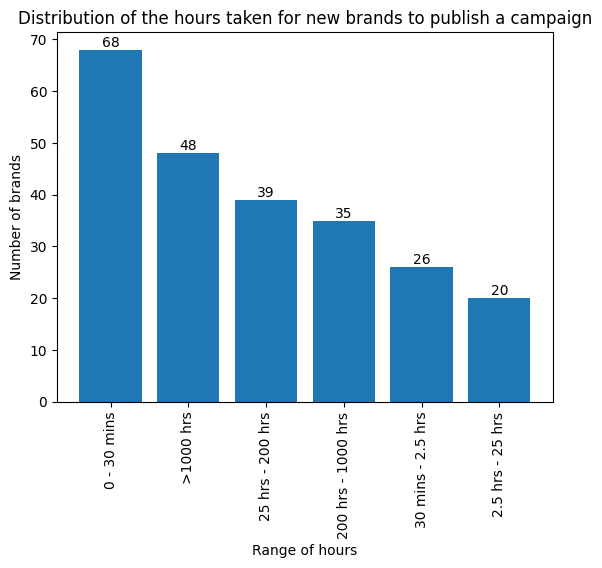

In [185]:
ranges = range_counts.Range
counts = range_counts.Count

fig, ax = plt.subplots()
bars = ax.bar(ranges, counts)

y_pos = range(len(ranges))
plt.xticks(y_pos, ranges, rotation=90)

plt.xlabel('Range of hours')
plt.ylabel('Number of brands')
plt.title('Distribution of the hours taken for new brands to publish a campaign')

ax.bar_label(bars)

## 4. RESULT - For new brands to publish a campaign, it takes a few minutes to a few years. Few brands published campaigns within minutes with the fastest being 1minute 23 seconds and a few brands took years to publish their first campaign, the slowest one taking 681 days. 